In [1]:
import math
import numpy as np
from diffusions_maps import diffusion_map
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.dpi'] = 50 # For memory saving purposes



import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

## Generating Swiss roll dataset

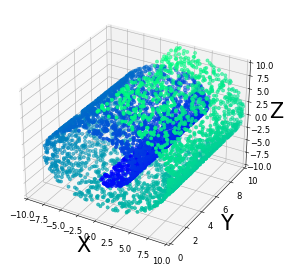

In [36]:
N_1 = 5000
#N_2 = 1000
X_es1, t1 = make_swiss_roll(N_1, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X1 = X_es1[:, 0]
Y1 = X_es1[:, 1]
Z1 = X_es1[:, 2]
X1, Y1, Z1 = 10*X1/np.max(X1), 10*Y1/np.max(Y1), 10*Z1/np.max(Z1)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X1, Y1, Z1, c=t1, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

In [68]:
X_es1.shape[0]


5000

In [4]:
t1

array([ 7.18191336,  6.20795018,  7.33366967, ...,  8.23916759,
        5.19519447, 10.8181326 ])

## 97 dimensions of Noise

In [56]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x28B8037C7C0

In [57]:
Unormal = rng.normal(loc=0, scale=1, size=(100,100))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, ...,  0.0330001 ,
        -1.42534896,  0.33281361],
       [-0.65128101,  0.8624448 , -0.12559208, ...,  0.16810587,
         0.54840545, -1.06512473],
       [ 1.82843024,  2.02007337, -1.06477104, ...,  0.66804743,
         1.78469827, -0.30968756],
       ...,
       [-1.59789882, -1.07075132, -0.02124174, ...,  0.48541752,
        -0.44586364, -0.22503676],
       [ 0.33207333, -0.7612935 , -0.99979222, ...,  2.14018605,
         0.014854  , -1.15467902],
       [-1.94705489,  1.00161437,  1.40675412, ...,  0.30125226,
        -0.77127986,  0.18548426]])

In [58]:
U, S, VT = np.linalg.svd(Unormal)

In [59]:
noise_shape = (5000,97)
noise_vals = np.random.normal(0,0.5,noise_shape)
noise_vals

array([[ 0.08923073,  0.35173366,  0.08474376, ..., -0.35103985,
         0.63136989, -0.69669142],
       [-0.61913218, -0.57925976,  0.11258945, ...,  0.50395571,
        -0.68196078,  0.07108387],
       [-0.68641103,  0.33614191,  0.58396772, ..., -0.44212463,
         0.55264273, -0.54105785],
       ...,
       [ 0.23936746,  0.61861096,  0.33317317, ..., -0.44273952,
         1.09795954, -0.13875683],
       [ 0.06832162, -1.08182384, -0.09620763, ...,  0.19946547,
        -0.1052577 ,  0.2276843 ],
       [-0.53318368, -0.17810304,  0.67120438, ...,  0.71425195,
        -0.00375584,  0.11737521]])

In [60]:
t_set = np.hstack((X_es1,noise_vals))
t_set.shape
t_set

array([[ 4.47150101e+00,  9.68614616e+00,  5.62010305e+00, ...,
        -3.51039854e-01,  6.31369894e-01, -6.96691416e-01],
       [ 6.19038897e+00,  8.51299009e-02, -4.66615408e-01, ...,
         5.03955710e-01, -6.81960781e-01,  7.10838747e-02],
       [ 3.64594004e+00,  1.89944838e+01,  6.36316211e+00, ...,
        -4.42124627e-01,  5.52642730e-01, -5.41057853e-01],
       ...,
       [-3.09571458e+00,  1.33648354e+00,  7.63547208e+00, ...,
        -4.42739523e-01,  1.09795954e+00, -1.38756829e-01],
       [ 2.41195115e+00,  1.50962602e+01, -4.60136254e+00, ...,
         1.99465465e-01, -1.05257703e-01,  2.27684305e-01],
       [-1.90953038e+00,  4.93335445e+00, -1.06482715e+01, ...,
         7.14251955e-01, -3.75583665e-03,  1.17375211e-01]])

In [61]:
X_es1_new = t_set @ U

In [62]:
num_values_1 = 10
λ_1, Φ_1 = diffusion_map(X_es1_new, num_values_1)
print(f'λ of shape {np.shape(λ_1)} and values: \n \n {λ_1}')

λ of shape (10,) and values: 
 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


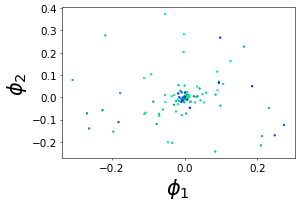

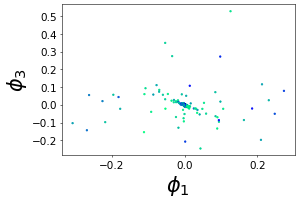

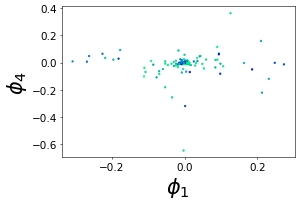

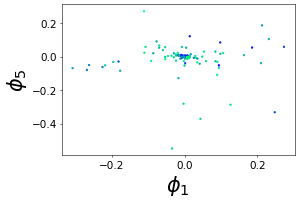

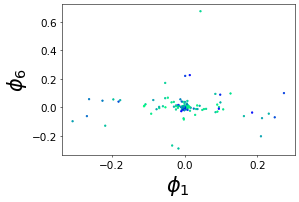

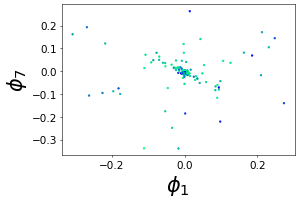

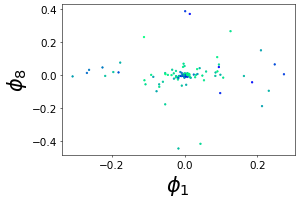

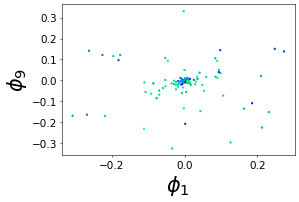

In [63]:
Φ_1_flipped = np.fliplr(Φ_1) # Flip to get in order of decending λ
hor_axis_eigen = Φ_1_flipped.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_1_flipped[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 1 dimension of noise

In [39]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x28B8037C400

In [41]:
Unormal = rng.normal(loc=0, scale=1, size=(4,4))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723],
       [ 0.90535587,  0.44637457, -0.53695324,  0.5811181 ],
       [ 0.3645724 ,  0.2941325 ,  0.02842224,  0.54671299],
       [-0.73645409, -0.16290995, -0.48211931,  0.59884621]])

In [42]:
U, S, VT = np.linalg.svd(Unormal)

In [43]:
noise_shape_n1 = (5000,1)
noise_vals_n1 = np.random.normal(0,0.5,noise_shape_n1)
np.min(X_es1)

-11.040707681588836

In [44]:
t_set_n1 = np.hstack((X_es1,noise_vals_n1))
t_set_n1.shape
t_set_n1

array([[  4.47150101,   9.68614616,   5.62010305,  -0.26603158],
       [  6.19038897,   0.0851299 ,  -0.46661541,  -0.1636141 ],
       [  3.64594004,  18.99448381,   6.36316211,  -0.3045315 ],
       ...,
       [ -3.09571458,   1.33648354,   7.63547208,   0.31498284],
       [  2.41195115,  15.09626019,  -4.60136254,  -0.13197737],
       [ -1.90953038,   4.93335445, -10.64827153,   0.52864424]])

In [45]:
#newList_n1 = []
#for i in range(4):
#    r_n1 = t_set_n1.T[i:i+2,:].mean(axis=0)
#    newList_n1.append(r_n1)
#newArray_n1 = np.array(newList_n1)
#X_es1_n1 = newArray_n1.T
X_es1_n1 = t_set_n1 @ U

In [46]:
num_values_1 = 10
λ_n1, Φ_n1 = diffusion_map(X_es1_n1, num_values_1)
print(f'λ of shape {np.shape(λ_n1)} and values: \n \n {λ_n1}')

λ of shape (10,) and values: 
 
 [0.99657048 0.99670026 0.99721715 0.99758493 0.99780013 0.99785634
 0.99881292 0.99946908 0.99986851 1.        ]


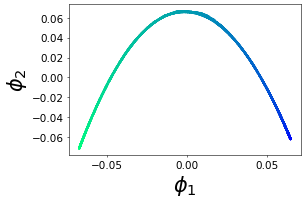

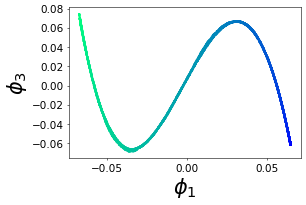

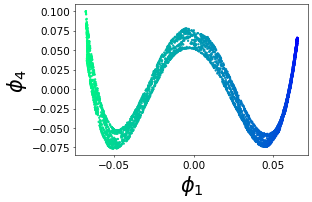

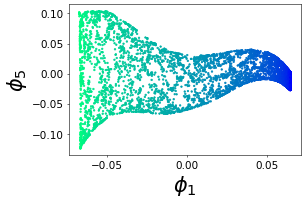

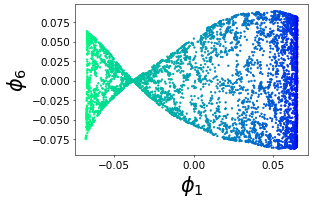

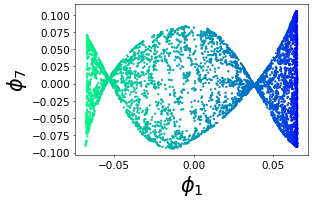

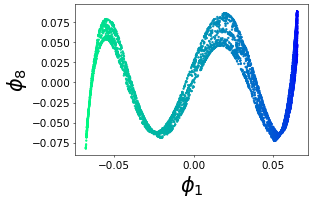

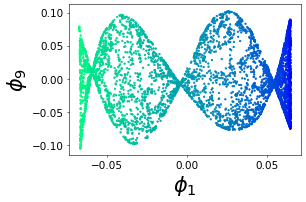

In [47]:
Φ_1_flipped_n1 = np.fliplr(Φ_n1) # Flip to get in order of decending λ
hor_axis_eigen_n1 = Φ_1_flipped_n1.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n1, Φ_1_flipped_n1[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 2 noise dimensions

In [48]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x28B8037C9A0

In [49]:
Unormal = rng.normal(loc=0, scale=1, size=(5,5))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723,  0.90535587],
       [ 0.44637457, -0.53695324,  0.5811181 ,  0.3645724 ,  0.2941325 ],
       [ 0.02842224,  0.54671299, -0.73645409, -0.16290995, -0.48211931],
       [ 0.59884621,  0.03972211, -0.29245675, -0.78190846, -0.25719224],
       [ 0.00814218, -0.27560291,  1.29406381,  1.00672432, -2.71116248]])

In [50]:
U, S, VT = np.linalg.svd(Unormal)

In [51]:
noise_shape_n2 = (5000,2)
noise_vals_n2 = np.random.normal(0,0.5,noise_shape_n2)
noise_vals_n2

array([[ 0.60813057, -0.21338875],
       [ 0.89805248,  0.55655294],
       [-0.27230106,  0.35332777],
       ...,
       [-0.44060799, -0.32231709],
       [-0.14206972, -0.6609692 ],
       [-0.85978577, -0.5854886 ]])

In [52]:
t_set_n2 = np.hstack((X_es1,noise_vals_n2))
t_set_n2.shape
t_set_n2

array([[  4.47150101,   9.68614616,   5.62010305,   0.60813057,
         -0.21338875],
       [  6.19038897,   0.0851299 ,  -0.46661541,   0.89805248,
          0.55655294],
       [  3.64594004,  18.99448381,   6.36316211,  -0.27230106,
          0.35332777],
       ...,
       [ -3.09571458,   1.33648354,   7.63547208,  -0.44060799,
         -0.32231709],
       [  2.41195115,  15.09626019,  -4.60136254,  -0.14206972,
         -0.6609692 ],
       [ -1.90953038,   4.93335445, -10.64827153,  -0.85978577,
         -0.5854886 ]])

In [53]:
#newList_n2 = []
#for i in range(5):
#    r_n2 = t_set_n2.T[i:i+2,:].mean(axis=0)
#    newList_n2.append(r_n2)
#newArray_n2 = np.array(newList_n2)
#X_es1_n2 = newArray_n2.T
X_es1_n2 = t_set_n2 @ U

In [54]:
num_values_1 = 10
λ_n2, Φ_n2 = diffusion_map(X_es1_n2, num_values_1)
print(f'λ of shape {np.shape(λ_n2)} and values: \n \n {λ_n2}')

λ of shape (10,) and values: 
 
 [0.99670376 0.99684003 0.99731588 0.99766567 0.99789636 0.99791826
 0.99885809 0.99948392 0.99987462 1.        ]


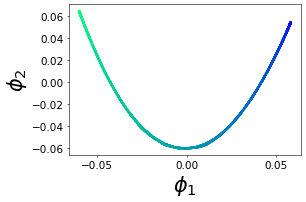

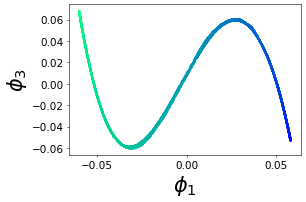

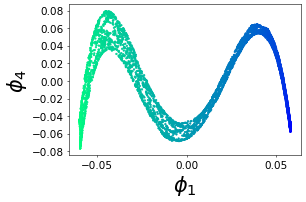

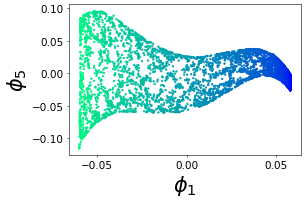

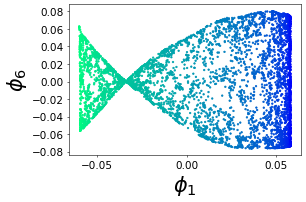

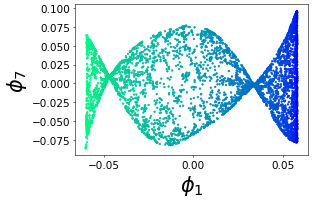

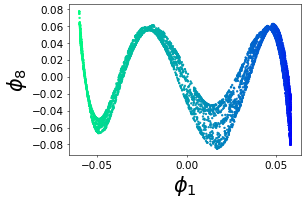

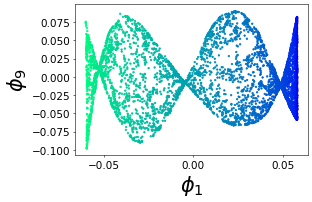

In [55]:
Φ_1_flipped_n2 = np.fliplr(Φ_n2) # Flip to get in order of decending λ
hor_axis_eigen_n2 = Φ_1_flipped_n2.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n2, Φ_1_flipped_n2[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 5 noise dimensions

In [ ]:
rng = np.random.default_rng(1)
rng

In [ ]:
Unormal = rng.normal(loc=0, scale=1, size=(5,5))
Unormal

In [ ]:
U, S, VT = np.linalg.svd(Unormal)

In [ ]:
noise_shape_n5 = (5000,5)
noise_vals_n5 = np.random.normal(0,0.5,noise_shape_n5)
noise_vals_n5

In [ ]:
t_set_n5 = np.hstack((X_es1,noise_vals_n5))
t_set_n5.shape
t_set_n5

In [ ]:
X_es1_n5 = t_set_n5 @ U

In [ ]:
num_values_1 = 10
λ_n5, Φ_n5 = diffusion_map(X_es1_n5, num_values_1)
print(f'λ of shape {np.shape(λ_n2)} and values: \n \n {λ_n2}')

In [ ]:
Φ_1_flipped_n2 = np.fliplr(Φ_n2) # Flip to get in order of decending λ
hor_axis_eigen_n2 = Φ_1_flipped_n2.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n2, Φ_1_flipped_n2[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Plotting Eigen functions against each other

In [20]:
num_values_1 = 10
λ_1, Φ_1 = diffusion_map(X_es1, num_values_1)
print(f'λ of shape {np.shape(λ_1)} and values: \n \n {λ_1}')

λ of shape (10,) and values: 
 
 [0.99644983 0.99656431 0.99712197 0.99750255 0.99770489 0.9977625
 0.99876528 0.99944838 0.99986369 1.        ]


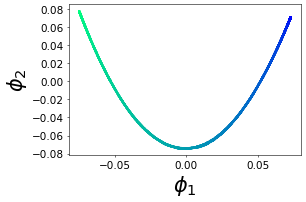

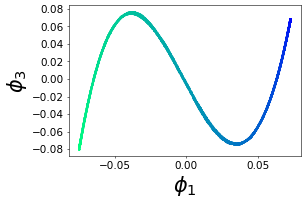

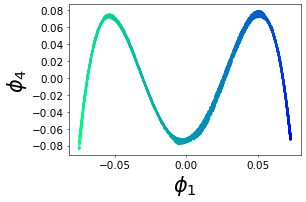

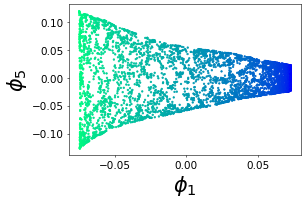

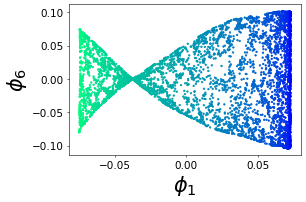

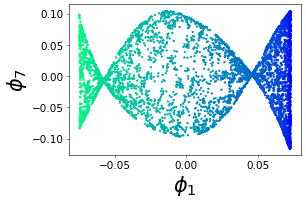

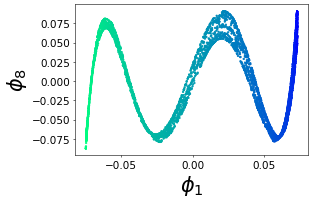

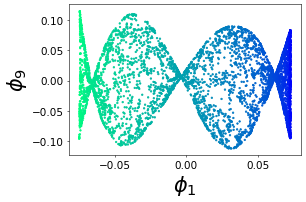

In [21]:
Φ_1_flipped = np.fliplr(Φ_1) # Flip to get in order of decending λ
hor_axis_eigen = Φ_1_flipped.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_1_flipped[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [22]:
data = np.column_stack((X1, Y1, Z1))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.29358880172722185, cut-off = 2.325533398301707


In [23]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

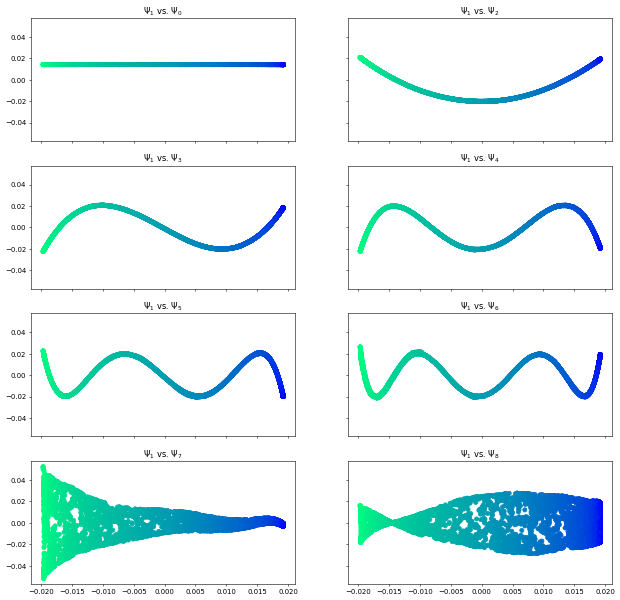

In [24]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t1, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [25]:
data = np.column_stack((X1, Y1, Z1))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

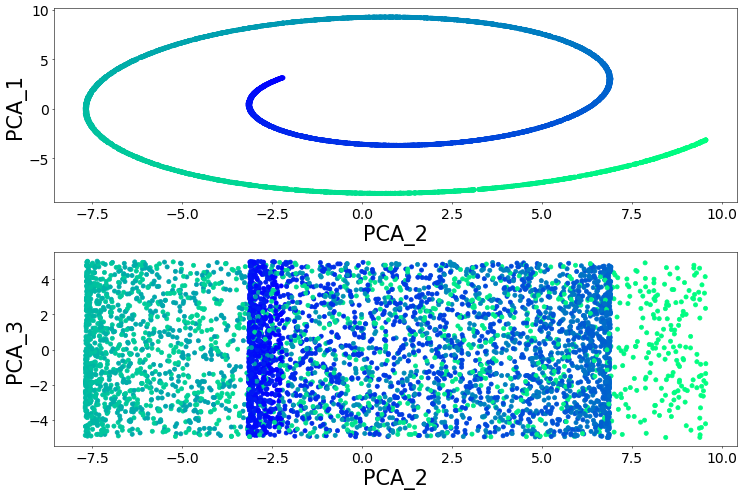

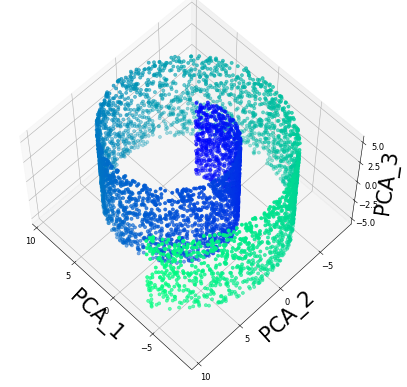

In [26]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t1, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()

## Generating S-curve dataset

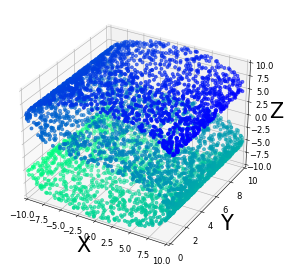

In [27]:
N_2 = 5000
#N_2 = 1000
X_es2, t2 = make_s_curve(N_2, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X2 = X_es2[:, 0]
Y2 = X_es2[:, 1]
Z2 = X_es2[:, 2]
X2, Y2, Z2 = 10*X2/np.max(X2), 10*Y2/np.max(Y2), 10*Z2/np.max(Z2)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X2, Y2, Z2, c=t2, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

In [28]:
num_values_2 = 10
λ_2, Φ_2 = diffusion_map(X_es2, num_values_2)
print(f'λ of shape {np.shape(λ_2)} and values: \n \n {λ_2}')

λ of shape (10,) and values: 
 
 [0.66018137 0.69654678 0.71698529 0.74508655 0.76004528 0.79923392
 0.88063601 0.94527914 0.98628597 1.        ]


## Plotting Eigen functions against each other

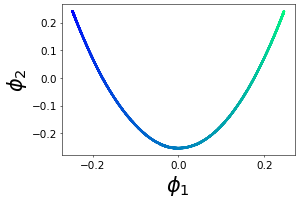

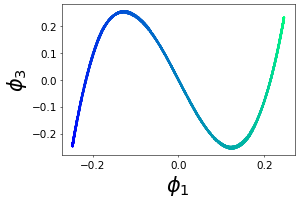

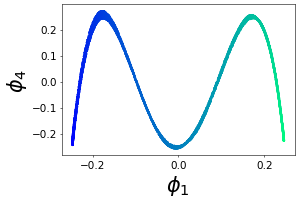

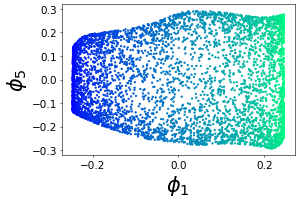

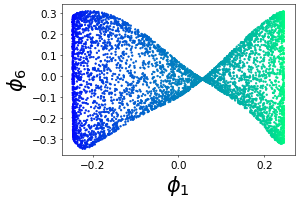

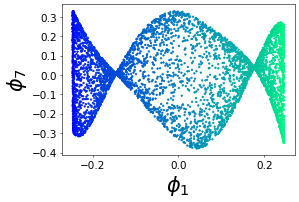

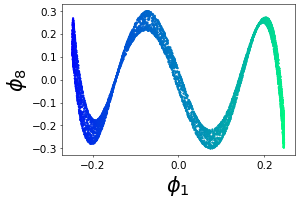

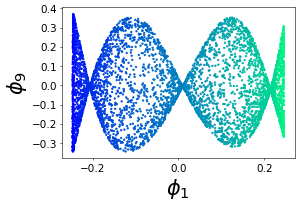

In [29]:
Φ_2_flipped = np.fliplr(Φ_2) # Flip to get in order of decending λ
hor_axis_eigen = Φ_2_flipped.T[1]
for i in range(2, num_values_2):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_2_flipped[:,i], s=5, c=t2, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [30]:
data = np.column_stack((X2, Y2, Z2))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.2073168464533744, cut-off = 1.9542050663532227


In [31]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

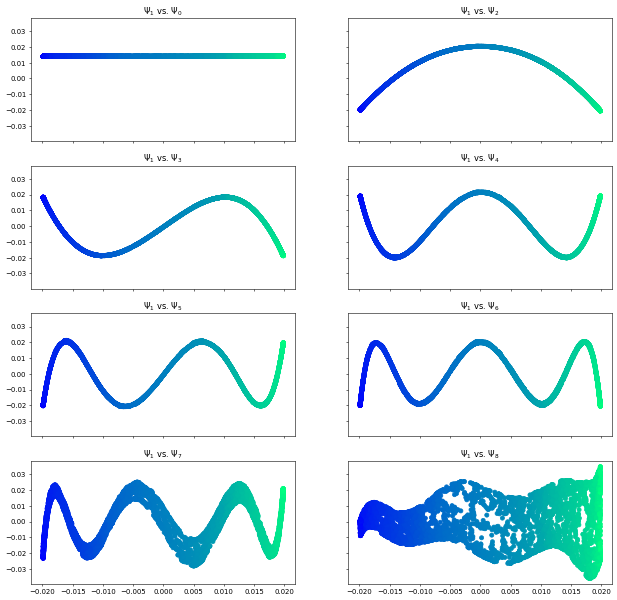

In [32]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t2, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [33]:
data = np.column_stack((X2, Y2, Z2))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

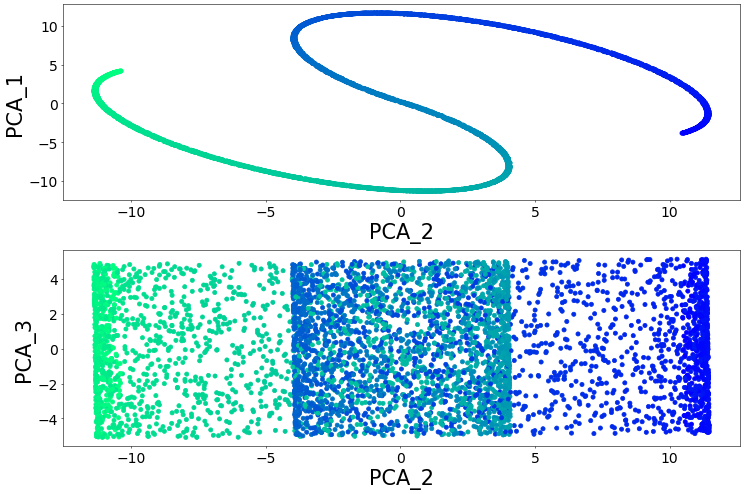

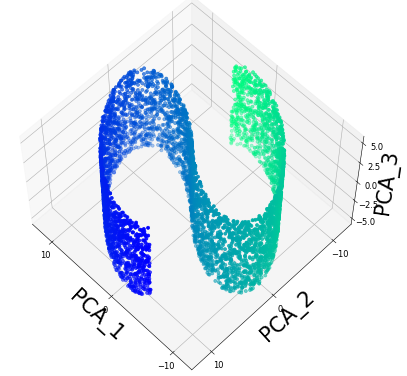

In [34]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t2, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()